In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os


In [2]:
df=pd.read_excel(r"C:\Users\Cyborg\Downloads\Instant Raw Report (11).xlsx")

In [3]:
df.describe()

,Active_Power,Apparent_Power,Current_R,Current_Y,Current_B,Voltage_R,Voltage_Y,Voltage_B,Frequency,MD_kVA,MD_kW,R_Phase,Y_Phase,B_Phase,Total_Active_Energy,Total_Apparent_Energy,Current_Day_KWH,Current_Day_KVAh
count,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000
mean,2.168326,2.182518,4.783605,1.353747,3.043582,239.106235,239.375387,239.260362,50.014967,4.027826,4.005151,1.131102,0.315103,0.717826,6554.472007,6592.560025,26.731829,26.926167
std,2.381102,2.396681,5.228688,1.959552,3.338796,8.257170,8.790644,9.200175,0.066142,1.907022,1.895738,1.235374,0.454676,0.788004,448.534381,451.449749,10.722209,10.792976
min,0.000000,0.000000,0.000000,0.000000,0.000000,220.980000,220.210000,219.570000,49.721000,0.000000,0.000000,0.000000,0.000000,0.000000,5743.752000,5776.698000,0.018000,0.031000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,232.330000,231.990000,231.360000,49.983000,1.290000,1.280000,0.000000,0.000000,0.000000,6174.681000,6210.318000,24.067000,24.283000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,238.750000,239.060000,239.000000,50.022000,5.350000,5.320000,0.000000,0.000000,0.000000,6571.720000,6609.643000,27.296000,27.534000
75%,4.580000,4.610000,10.470000,1.370000,6.720000,246.240000,247.150000,247.110000,50.061000,5.350000,5.320000,2.470000,0.310000,1.580000,6940.359000,6980.919000,31.699000,31.909000
max,5.540000,5.570000,11.520000,5.640000,7.900000,257.190000,258.940000,259.490000,50.327000,5.350000,5.320000,2.690000,1.290000,1.870000,7329.234000,7372.664000,59.054000,59.439000


In [4]:
print("Number of data points:",df.shape[0])
print("Number of Cols:",df.shape[1])

Number of data points: 2677
Number of Cols: 29


In [5]:
df.head(4)

,CCMS_ID,Timestamp,Active_Power,Apparent_Power,Current_R,Current_Y,Current_B,Voltage_R,Voltage_Y,Voltage_B,...,B_Phase,Active_Mode,Total_Active_Energy,Total_Apparent_Energy,Current_Day_KWH,Current_Day_KVAh,Power_On_Time,Relay_On_Time,Current_Day_Meter_On_Period,Current_Day_Relay_On_Period
0,SMR03-0219-0252,2019-05-01 23:44:42,5.11,5.15,10.66,5.47,5.85,233.48,234.57,235.40,...,1.36,AUTO,7329.234,7372.664,49.204,49.591,1615:42:7,791:3:44,22:47:44,9:38:30
1,SMR03-0219-0252,2019-05-01 23:29:04,5.11,5.14,10.65,5.48,5.83,233.56,234.34,235.45,...,1.35,AUTO,7327.901,7371.322,47.871,48.249,1615:26:31,790:48:8,22:32:8,9:22:54
2,SMR03-0219-0252,2019-05-01 23:13:58,5.11,5.14,10.74,5.52,5.89,231.74,232.72,233.72,...,1.35,AUTO,7326.616,7370.028,46.586,46.955,1615:11:25,790:33:2,22:17:2,9:7:48
3,SMR03-0219-0252,2019-05-01 22:57:49,5.12,5.16,10.73,5.53,5.90,232.01,233.22,234.14,...,1.36,AUTO,7325.238,7368.641,45.208,45.568,1614:55:17,790:16:54,22:0:54,8:51:40


In [6]:
# df.info()

In [7]:
df.columns

Index(['CCMS_ID', 'Timestamp', 'Active_Power', 'Apparent_Power', 'Current_R',
       'Current_Y', 'Current_B', 'Voltage_R', 'Voltage_Y', 'Voltage_B',
       'Total_PF', 'Frequency', 'MD_kVA', 'MD_kW', 'Load_Relay_Status_R',
       'Load_Relay_Status_Y', 'Load_Relay_Status_B', 'R_Phase', 'Y_Phase',
       'B_Phase', 'Active_Mode', 'Total_Active_Energy',
       'Total_Apparent_Energy', 'Current_Day_KWH', 'Current_Day_KVAh',
       'Power_On_Time', 'Relay_On_Time', 'Current_Day_Meter_On_Period',
       'Current_Day_Relay_On_Period'],
      dtype='object')

In [8]:
sorted_active_power = df.sort_values(['Active_Power'], ascending=False)
active_power_counts = sorted_active_power['Active_Power'].values
sorted_apparent_power = df.sort_values(['Apparent_Power'], ascending=False)
apparent_power_counts = sorted_apparent_power['Apparent_Power'].values

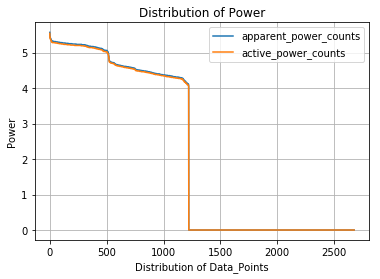

In [9]:

plt.plot(apparent_power_counts, label="apparent_power_counts")
plt.plot(active_power_counts, label="active_power_counts")
plt.title("Distribution of Power")
plt.grid()
plt.xlabel("Distribution of Data_Points")
plt.ylabel("Power")
plt.legend()
plt.show()

In [10]:
sorted_Vr = df.sort_values(['Voltage_R'], ascending=False)
Vr_counts = sorted_Vr['Voltage_R'].values
sorted_Vb = df.sort_values(['Voltage_B'], ascending=False)
Vb_counts = sorted_Vb['Voltage_B'].values
sorted_Vy = df.sort_values(['Voltage_Y'], ascending=False)
Vy_counts = sorted_Vy['Voltage_Y'].values

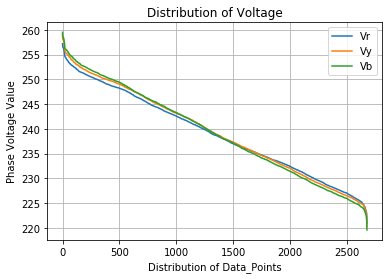

In [11]:
plt.plot(Vr_counts, label="Vr")
plt.plot(Vy_counts, label="Vy")
plt.plot(Vb_counts, label="Vb")
plt.title("Distribution of Voltage")
plt.grid()
plt.xlabel("Distribution of Data_Points")
plt.ylabel("Phase Voltage Value")
plt.legend()
plt.show()

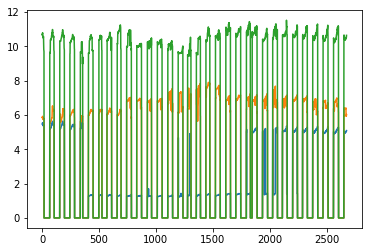

In [15]:
plt.plot( df["Current_Y"], label="Iy")
plt.plot( df["Current_B"], label="Ib")
plt.plot( df["Current_R"], label="Ir")
plt.show()

### Distribution of Current

In [16]:
sorted_Ir = df.sort_values(['Current_R'], ascending=False)
Ir_counts = sorted_Ir['Current_R'].values
sorted_Ib = df.sort_values(['Current_B'], ascending=False)
Ib_counts = sorted_Ib['Current_B'].values
sorted_Iy = df.sort_values(['Current_Y'], ascending=False)
Iy_counts = sorted_Iy['Current_Y'].values

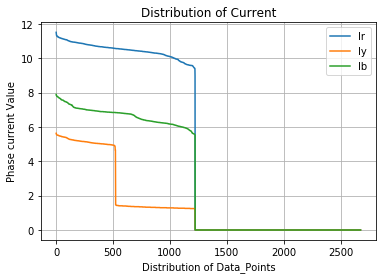

In [17]:
plt.plot(Ir_counts, label="Ir")
plt.plot(Iy_counts, label="Iy")
plt.plot(Ib_counts, label="Ib")
plt.title("Distribution of Current")
plt.grid()
plt.xlabel("Distribution of Data_Points")
plt.ylabel("Phase current Value")
plt.legend()
plt.show()

### Current Day Time

In [18]:
sorted_Ir = df.sort_values(['Current_Day_KWH'], ascending=False)
Ir_counts = sorted_Ir['Current_Day_KWH'].values
sorted_Ib = df.sort_values(['Current_Day_KVAh'], ascending=False)
Ib_counts = sorted_Ib['Current_Day_KVAh'].values
# sorted_Iy = df.sort_values(['Current_Y'], ascending=False)
# Iy_counts = sorted_Iy['Current_Y'].values

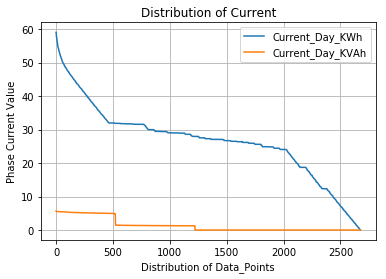

In [19]:
plt.plot(Ir_counts, label="Current_Day_KWh")
plt.plot(Iy_counts, label="Current_Day_KVAh")
# plt.plot(Ib_counts, label="Ib")
plt.title("Distribution of Current")
plt.grid()
plt.xlabel("Distribution of Data_Points")
plt.ylabel("Phase Current Value")
plt.legend()
plt.show()

In [20]:
df.columns

Index(['CCMS_ID', 'Timestamp', 'Active_Power', 'Apparent_Power', 'Current_R',
       'Current_Y', 'Current_B', 'Voltage_R', 'Voltage_Y', 'Voltage_B',
       'Total_PF', 'Frequency', 'MD_kVA', 'MD_kW', 'Load_Relay_Status_R',
       'Load_Relay_Status_Y', 'Load_Relay_Status_B', 'R_Phase', 'Y_Phase',
       'B_Phase', 'Active_Mode', 'Total_Active_Energy',
       'Total_Apparent_Energy', 'Current_Day_KWH', 'Current_Day_KVAh',
       'Power_On_Time', 'Relay_On_Time', 'Current_Day_Meter_On_Period',
       'Current_Day_Relay_On_Period'],
      dtype='object')

## Max Demand Power Distribution

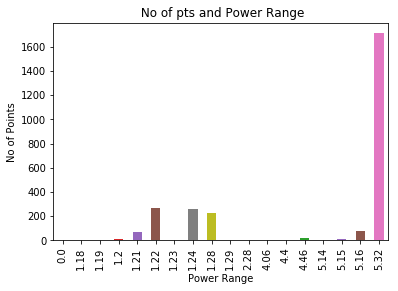

In [21]:
df.groupby("MD_kW")['MD_kW'].count().plot.bar()
plt.xlabel("Power Range")
plt.ylabel("No of Points")
plt.title(" No of pts and Power Range")
plt.show()

In [22]:
# df.groupby("MD_kVA")['CCMS_ID'].count().plot.bar()
# plt.show()

In [23]:
df["label"]=" "

In [24]:
df.shape

(2677, 30)

In [26]:
# df.describe()
# a=0
# b=1
# df['MD_kVA'] = df['MD_kVA'].astype('float')
# i=0
# while(i<2675):
#     if(df['MD_kVA'][i]>2.8):
#         df['label'][i] =0
        
#     else:
#         df['label'][i] =1
#     i=i+1
        

In [ ]:
df['MD_kVA'][80:87]

In [ ]:
df['label'][80:87]

In [ ]:
df.shape

In [ ]:
df.to_excel("Street light Complaint Details last 6 Month.xlsx")

In [27]:
df=pd.read_excel(r"C:\Users\Cyborg\Documents\GitHub\CCMS\Instant Raw Report Updated.xlsx")

In [28]:
df.describe()

,Active_Power,Apparent_Power,Current_R,Current_Y,Current_B,Voltage_R,Voltage_Y,Voltage_B,Frequency,MD_kVA,R_Phase,Y_Phase,B_Phase,Total_Active_Energy,Total_Apparent_Energy,Current_Day_KWH,Current_Day_KVAh,label
count,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000
mean,2.168326,2.182518,4.783605,1.353747,3.043582,239.106235,239.375387,239.260362,50.014967,4.027826,1.131102,0.315103,0.717826,6554.472007,6592.560025,26.731829,26.926167,0.318267
std,2.381102,2.396681,5.228688,1.959552,3.338796,8.257170,8.790644,9.200175,0.066142,1.907022,1.235374,0.454676,0.788004,448.534381,451.449749,10.722209,10.792976,0.465891
min,0.000000,0.000000,0.000000,0.000000,0.000000,220.980000,220.210000,219.570000,49.721000,0.000000,0.000000,0.000000,0.000000,5743.752000,5776.698000,0.018000,0.031000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,232.330000,231.990000,231.360000,49.983000,1.290000,0.000000,0.000000,0.000000,6174.681000,6210.318000,24.067000,24.283000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,238.750000,239.060000,239.000000,50.022000,5.350000,0.000000,0.000000,0.000000,6571.720000,6609.643000,27.296000,27.534000,0.000000
75%,4.580000,4.610000,10.470000,1.370000,6.720000,246.240000,247.150000,247.110000,50.061000,5.350000,2.470000,0.310000,1.580000,6940.359000,6980.919000,31.699000,31.909000,1.000000
max,5.540000,5.570000,11.520000,5.640000,7.900000,257.190000,258.940000,259.490000,50.327000,5.350000,2.690000,1.290000,1.870000,7329.234000,7372.664000,59.054000,59.439000,1.000000


In [29]:
df.columns

Index(['CCMS_ID', 'Timestamp', 'Active_Power', 'Apparent_Power', 'Current_R',
       'Current_Y', 'Current_B', 'Voltage_R', 'Voltage_Y', 'Voltage_B',
       'Total_PF', 'Frequency', 'MD_kVA', 'MD_kW', 'Load_Relay_Status_R',
       'Load_Relay_Status_Y', 'Load_Relay_Status_B', 'R_Phase', 'Y_Phase',
       'B_Phase', 'Active_Mode', 'Total_Active_Energy',
       'Total_Apparent_Energy', 'Current_Day_KWH', 'Current_Day_KVAh',
       'Power_On_Time', 'Relay_On_Time', 'Current_Day_Meter_On_Period',
       'Current_Day_Relay_On_Period', 'label'],
      dtype='object')

In [30]:
df.shape

(2677, 30)

In [31]:
df=df[df.Current_Y>=0.05]
df=df[df.Current_B>=0.05]
df=df[df.Current_R>=0.05]

In [32]:
df.shape


(1222, 30)

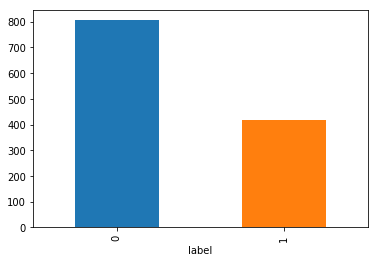

In [33]:
df.groupby("label")['CCMS_ID'].count().plot.bar()
plt.show()

In [34]:
x=df[['Active_Power', 'Apparent_Power', 'Current_R', 'Current_Y', 'Current_B', 'Voltage_R', 'Voltage_Y', 'Voltage_B', 'Total_Apparent_Energy', 'Current_Day_KWH', 'Current_Day_KVAh']]

In [35]:
y=df['label'].astype("int")

In [36]:
x.head(3)

,Active_Power,Apparent_Power,Current_R,Current_Y,Current_B,Voltage_R,Voltage_Y,Voltage_B,Total_Apparent_Energy,Current_Day_KWH,Current_Day_KVAh
0,5.11,5.15,10.66,5.47,5.85,233.48,234.57,235.40,7372.664,49.204,49.591
1,5.11,5.14,10.65,5.48,5.83,233.56,234.34,235.45,7371.322,47.871,48.249
2,5.11,5.14,10.74,5.52,5.89,231.74,232.72,233.72,7370.028,46.586,46.955


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [40]:
# clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [41]:
parametersx=[{'C': [10**-4, 10**-2,0.75, 0.79, 0.80,0.81, 1, 5, 10, 20, 50, 10**2, 10**4]}]
clf = GridSearchCV(LogisticRegression(penalty='l2'), parametersx, cv=4, scoring='roc_auc', )
clf.fit(X_train, y_train)
pred=clf.predict_proba(X_test)[:, 1]
print(clf.best_estimator_)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9910207842314606
0.999731182795699


#### Clustering

In [42]:
df.shape

(1222, 30)

In [43]:
df=df[df['label']==1
     ]

In [44]:
df.shape

(417, 30)

In [45]:
x_train=df[:350]
x_test=df[350:]
y_train=df['label'][:350]
y_test=df['label'][350:]

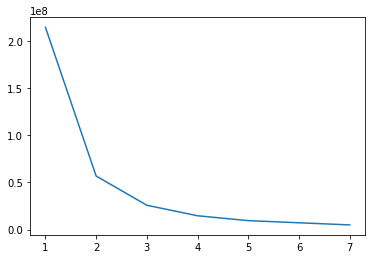

In [46]:
from sklearn.cluster import KMeans
errors=[]
k_value=[1,2,3,4,5,7]
for i in k_value:
    kmeans = KMeans(n_clusters=i, random_state=0, n_jobs=-1)
    kmeans.fit(X_train)
    pred=kmeans.predict(X_test)
    errors.append(kmeans.inertia_)
plt.plot(k_value, errors)
plt.show()

In [48]:
# # import seaborn as sns
# plt.plot(kind='scatter', x=x_train, y=y_train, data=df) ;
# plt.show()


In [ ]:
if df['MD_kW']> 2.8 :
    df['label']="on"